In [2]:
pip install tensorflow

     -------------------------------------- 300.9/300.9 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 8.6 MB/s eta 0:00:00
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 5.5/5.5 MB 25.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ------------------------------------- 442.0/442.0 kB 13.9 MB/s eta 0:00:00
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
     ---------------------------------------- 3.7/3.7 MB 26.0 MB/s eta 0:00:00
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
     ------------------------------------- 938.6/938.6 kB 29.9 MB/s eta 0:00:00
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached astunparse-1.6.3-p

Churn Analysis and Prediction

Predicting Customer Churn: Machine Learning Strategies for E-commerce Retention

In [17]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [2]:
# Read the Excel File.
import pandas as pd
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [5]:
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress   

In [6]:
# Find the perccentage of missing values in each column
round((df.isnull().sum()*100 / df.shape[0]),2)

# Missing values in each column are relatively low, roughly 5% on average. We can therefore impute the missing values

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [7]:
# use the iterative imputer to fill missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=1)

columns_to_impute = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
                     'OrderCount', 'DaySinceLastOrder']

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [8]:
# merge with original df
df_imputed = pd.DataFrame(df[columns_to_impute], columns=columns_to_impute)
df_imputed = df_imputed.round()

df_updated = pd.concat([df.drop(columns=columns_to_impute), df_imputed], axis=1)
df_updated.head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CashbackAmount,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,50001,1,Mobile Phone,3,Debit Card,Female,3,Laptop & Accessory,2,Single,9,1,159.93,4.0,6.0,3.0,11.0,1.0,1.0,5.0
1,50002,1,Phone,1,UPI,Male,4,Mobile,3,Single,7,1,120.90,8.0,8.0,3.0,15.0,0.0,1.0,0.0
2,50003,1,Phone,1,Debit Card,Male,4,Mobile,3,Single,6,1,120.28,9.0,30.0,2.0,14.0,0.0,1.0,3.0
3,50004,1,Phone,3,Debit Card,Male,4,Laptop & Accessory,5,Single,8,0,134.07,0.0,15.0,2.0,23.0,0.0,1.0,3.0
4,50005,1,Phone,1,CC,Male,3,Mobile,5,Single,3,0,129.60,0.0,12.0,3.0,11.0,1.0,1.0,3.0


In [9]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   PreferredPaymentMode         5630 non-null   object 
 5   Gender                       5630 non-null   object 
 6   NumberOfDeviceRegistered     5630 non-null   int64  
 7   PreferedOrderCat             5630 non-null   object 
 8   SatisfactionScore            5630 non-null   int64  
 9   MaritalStatus                5630 non-null   object 
 10  NumberOfAddress              5630 non-null   int64  
 11  Complain                     5630 non-null   int64  
 12  CashbackAmount               5630 non-null   float64
 13  Tenure            

In [10]:
round((df_updated.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.0
Churn                          0.0
PreferredLoginDevice           0.0
CityTier                       0.0
PreferredPaymentMode           0.0
Gender                         0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
CashbackAmount                 0.0
Tenure                         0.0
WarehouseToHome                0.0
HourSpendOnApp                 0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
dtype: float64

In [11]:
# create dummies out of categorical variables

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

columns_to_onehot = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

df_with_dummies = encoder.fit_transform(df_updated[columns_to_onehot]).toarray()

df_onehot_encoded = pd.DataFrame(df_with_dummies, columns=encoder.get_feature_names_out(columns_to_onehot))

df_final = pd.concat([df_updated.drop(columns=columns_to_onehot), df_onehot_encoded], axis=1)

df_final.head()

,CustomerID,Churn,CityTier,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CashbackAmount,Tenure,WarehouseToHome,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,3,3,2,9,1,159.93,4.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50002,1,1,4,3,7,1,120.90,8.0,8.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,50003,1,1,4,3,6,1,120.28,9.0,30.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,50004,1,3,4,5,8,0,134.07,0.0,15.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50005,1,1,3,5,3,0,129.60,0.0,12.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5630 non-null   int64  
 1   Churn                                  5630 non-null   int64  
 2   CityTier                               5630 non-null   int64  
 3   NumberOfDeviceRegistered               5630 non-null   int64  
 4   SatisfactionScore                      5630 non-null   int64  
 5   NumberOfAddress                        5630 non-null   int64  
 6   Complain                               5630 non-null   int64  
 7   CashbackAmount                         5630 non-null   float64
 8   Tenure                                 5630 non-null   float64
 9   WarehouseToHome                        5630 non-null   float64
 10  HourSpendOnApp                         5630 non-null   float64
 11  Orde

In [13]:
relevant_df = df_final.drop(["CustomerID"],axis=1)
relevant_df.head()

,Churn,CityTier,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CashbackAmount,Tenure,WarehouseToHome,HourSpendOnApp,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,3,3,2,9,1,159.93,4.0,6.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,4,3,7,1,120.90,8.0,8.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,1,4,3,6,1,120.28,9.0,30.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,3,4,5,8,0,134.07,0.0,15.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,3,5,3,0,129.60,0.0,12.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
from sklearn.model_selection import train_test_split

# Define feature columns (X) and target variable (y)
X = relevant_df.drop("Churn", axis=1)
y = relevant_df["Churn"]

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [27]:

# Create Logistic Regression model
logistic_model = LogisticRegression(random_state=1)

# Train the model on the training data
logistic_model.fit(X_train, y_train)


c:\Users\Isaac Technology\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)


# Generate classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.8877840909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.93      1176
           1       0.74      0.49      0.59       232

    accuracy                           0.89      1408
   macro avg       0.82      0.73      0.76      1408
weighted avg       0.88      0.89      0.88      1408

Confusion Matrix:
 [[1136   40]
 [ 118  114]]


In [31]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1']


<Axes: >

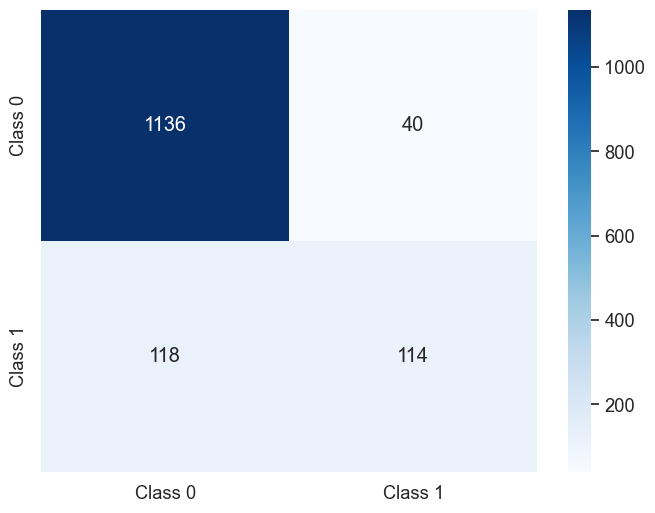

In [33]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

